In [2]:
import pandas as pd

# Ingest Dataset

In [3]:
df1 = pd.read_csv("Customer.csv")
df2 = pd.read_csv("prod_cat_info.csv")
df3 = pd.read_csv("Transactions.csv")

In [ ]:
# we have 3 dataset and we have to use it as 1 dataset for Recommender System
# before merge the dataset, we have to make sure that 3 dataset have 1 Foreign key 

In [4]:
df1.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [4]:
df2.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [5]:
df3.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [6]:
# df1 and df3 that can merge by using cust_id
# but firt, rename df1 customer_Id -> cust_id

In [5]:
df1.rename(columns={"customer_Id" : "cust_id"}, inplace=True)
df1.head(2)

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [9]:
print(df1.shape)
print(df3.shape)

(5647, 4)
(23053, 10)


In [6]:
# Do merge with left join, and to make sure that value on df1 merged on df3
df = df3.merge(df1, on="cust_id", how="left")

In [13]:
print(df.shape)
df.head(2)

(23053, 13)


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0


In [ ]:
# as we make new variable, df
# we can merge df and df2 using prod_cat_code & prod_subcat_code
# again, make sure that df2 have same name/value for the column

In [8]:
df2.rename(columns={"prod_sub_cat_code":"prod_subcat_code"}, inplace=True)

In [23]:
df2.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [9]:
df = pd.merge(df, df2, on=["prod_subcat_code","prod_cat_code"], how="left")

In [26]:
df.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers


In [27]:
# for cleansing purpose only, we can do standardization for tran_Date and DOB column
# as for cleansing and EDA data, we can proceed the data for anoter model
# like Churn customoer analysis, or Clustering customer

In [28]:
set(df["tran_date"])

{'1/3/2013',
 '9/8/2012',
 '5/8/2013',
 '26-08-2013',
 '21-06-2012',
 '11/6/2012',
 '28-10-2012',
 '7/6/2011',
 '8/2/2011',
 '7/6/2013',
 '28-03-2012',
 '19-07-2013',
 '2/3/2013',
 '31-03-2013',
 '7/2/2011',
 '15-04-2013',
 '24-01-2013',
 '1/12/2013',
 '24-03-2012',
 '4/8/2011',
 '29-03-2011',
 '10/7/2011',
 '5/12/2012',
 '15-06-2013',
 '19-02-2012',
 '5/8/2011',
 '15-04-2011',
 '18-06-2013',
 '12/8/2013',
 '5/5/2011',
 '30-10-2011',
 '4/9/2012',
 '3/12/2013',
 '12/3/2011',
 '14-07-2013',
 '28-05-2013',
 '24-09-2013',
 '30-01-2014',
 '31-07-2013',
 '24-06-2011',
 '2/4/2011',
 '3/5/2011',
 '4/3/2011',
 '10/3/2013',
 '29-11-2012',
 '25-06-2013',
 '26-04-2013',
 '1/12/2011',
 '30-03-2013',
 '6/9/2013',
 '6/10/2013',
 '17-03-2012',
 '10/10/2013',
 '28-11-2012',
 '14-07-2012',
 '29-04-2013',
 '13-01-2014',
 '30-01-2012',
 '28-07-2011',
 '30-05-2011',
 '4/4/2012',
 '21-05-2011',
 '9/2/2011',
 '31-07-2011',
 '2/10/2012',
 '22-02-2012',
 '30-05-2012',
 '13-04-2013',
 '2/1/2013',
 '20-10-2013',

In [ ]:
# replace "-", to "/"

In [10]:
df["tran_date"] = df["tran_date"].str.replace("-","/")

In [11]:
df["tran_date"].dtype

dtype('O')

In [ ]:
# convert tran_date type from object to date

In [12]:
df['tran_date'] = df['tran_date'].astype('datetime64[ns]')

In [13]:
df['tran_date'] = pd.to_datetime(df['tran_date'], format='%y%m%d') 

In [ ]:
# replace "-", to "/"

In [14]:
df["DOB"] = df["DOB"].str.replace("-","/")

In [ ]:
# convert DOB type from object to date

In [15]:
df['DOB'] = df['DOB'].astype('datetime64[ns]')

In [16]:
df['DOB'] = pd.to_datetime(df['DOB'], format='%d%m%y') 

In [17]:
# import library visualization
import seaborn as sns

<AxesSubplot:xlabel='total_amt'>

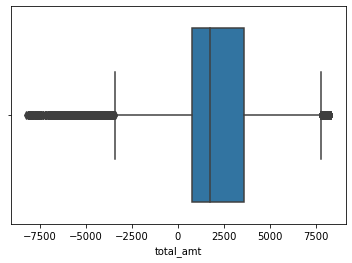

In [18]:
sns.boxplot(data=df, x="total_amt")

In [ ]:
# in this case, theres have negative value
# we can assume theres Retur happen in this case
# we need filltering data and to make sure only customer who purchase that have recommendation on ouput

In [19]:
df_1 = df.copy()

In [20]:
df_1 = df[df["total_amt"] >= 0]

In [115]:
df_1 = df.copy()

# we can just drop Missing value 
df_1 = df_1.dropna()

# Fundamental of Recommender System

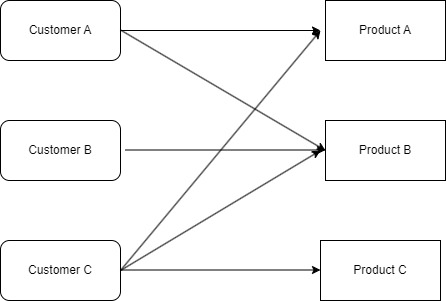

> Whats Content Based Filtering ?
where model suggest similar items based on a particular item, ini this case, items what customer pushacesed to make these as recommendations
assume what cusomer purchased as he or she like the items and needed most then model can recommendations item that similar with it

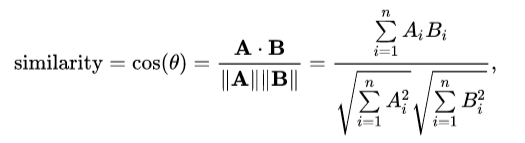

on Prod_cat and prod_subcat where dtype data is Object, the value have different words were used to items purchased by customer

with this matrix, we can compute a Similarity Score.
so we use cosine similarity scores

In [22]:
# Import TfIdfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF Vectorizer Object. when the value will we use as decider recommendation
tfidf = TfidfVectorizer(stop_words='english')


df['prod_cat'] = df['prod_cat'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['prod_cat'])

# Feature Selection
df_1 = df_1[["transaction_id","prod_cat","prod_subcat"]]
# Feature Engineering
# define 1 column for Recommendation System
df_1["product"] = df_1['prod_cat'] + '_' + df_1['prod_subcat']

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Transaction id to make sure we have 1 column for 1 value on transaction and make sure that unique value
indices = pd.Series(df_1.index, index=df_1['transaction_id']).drop_duplicates()

# in this case, use Cosine Similarity
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Fuction for run all rows and value where Product as input and outputs most similar Product for all type
def get_all_recommendations(df, cosine_sim=cosine_sim):
    all_recommendations = []

    for transaction_id, idx in indices.items():
        # Get the pairwsie similarity scores of all product with the current product
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort the recommendation based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the 100 most similar product
        # make sure that starting at 1, not 0 
        sim_scores = sim_scores[1:100]

        # Get the Transaction_id indices
        movie_indices = [i[0] for i in sim_scores]

        # Filter out missing indices
        valid_indices = [index for index in movie_indices if index in df.index]

        # Store the top 3 most similar Product in the list, in this case get unique value only
        recommendations = set(df.loc[valid_indices, 'product'])
        source_index = pd.Series([idx] * len(recommendations), name='source_index')
        
        # Create a DataFrame for the current recommendations
        recommendations_df = pd.DataFrame({ 'product_recomendation': list(recommendations), 'source_index': source_index })
        recommendations_df = recommendations_df.groupby("source_index")["product_recomendation"].agg(lambda x: ", ".join(x)).reset_index()
        
        # Append the current recommendations to the list
        all_recommendations.append(recommendations_df)

    # Concatenate all recommendations DataFrames
    final_recommendations_df = pd.concat(all_recommendations, ignore_index=True)
    
    #df_test = pd.concat([df,final_recommendations_df], ignore_index=True)
    
    final_recommendations_df = final_recommendations_df.rename(columns = {"source_index":"index"})
    df = df.reset_index()
    df_test = pd.merge(df, final_recommendations_df, how="left")
    df_test = df_test.drop(["index"], axis=1)

    #return final_recommendations_df
    #return all_recommendations
    return df_test

# # Call the function to get recommendations for all titles
# all_recommendations_df = get_all_recommendations(df)

# # Print the resulting DataFrame
# print(all_recommendations_df)


In [24]:
get_all_recommendations(df_1)

,transaction_id,prod_cat,prod_subcat,product,product_recomendation
0,29258453508,Electronics,Computers,Electronics_Computers,"Electronics_Audio and video, Electronics_Perso..."
1,25455265351,Home and kitchen,Tools,Home and kitchen_Tools,"Home and kitchen_Furnishing, Home and kitchen_..."
2,1571002198,Books,DIY,Books_DIY,"Books_Comics, Books_Non-Fiction, Books_DIY, Bo..."
3,36554696014,Books,Comics,Books_Comics,"Books_Comics, Books_Non-Fiction, Books_DIY, Bo..."
4,56814940239,Books,Fiction,Books_Fiction,"Books_Comics, Books_Non-Fiction, Books_DIY, Bo..."
...,...,...,...,...,...
20871,94340757522,Books,Academic,Books_Academic,"Books_Comics, Books_Non-Fiction, Books_DIY, Bo..."
20872,89780862956,Clothing,Mens,Clothing_Mens,"Clothing_Mens, Clothing_Kids, Clothing_Women"
20873,85115299378,Home and kitchen,Furnishing,Home and kitchen_Furnishing,"Home and kitchen_Furnishing, Home and kitchen_..."
20874,72870271171,Books,Children,Books_Children,"Books_Comics, Books_Non-Fiction, Books_DIY, Bo..."


In [25]:
# save the result of model as DataFrame
df_ReSys = get_all_recommendations(df_1)